# PedPy Notebook Visualization

In [1]:
import pedpy
from pedpy import load_trajectory, WalkableArea
import matplotlib.pyplot as plt
import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the Data

In [2]:
def preprocess_file(file_path, clean_path):
    # Load using pandas
    df = pd.read_csv(file_path, sep="\t", header=None, thousands=",")
    # Save in standard format without commas
    df.to_csv(clean_path, sep="\t", header=False, index=False)

# Preprocess PedPyStats.txt -> PedPyStats_clean.txt
preprocess_file("PedPyStats.txt", "PedPyStats_clean.txt")
preprocess_file("UserStats.txt", "UserStats_clean.txt")


# For agents
traj = load_trajectory(
    trajectory_file=pathlib.Path("PedPyStats_clean.txt"),
    default_frame_rate=100,
    default_unit=1
)

# For user
trajUser = load_trajectory(
    trajectory_file=pathlib.Path("UserStats_clean.txt"),
    default_frame_rate=100,
    default_unit=1
)

## Setting up the Data

### Walkable Area

In [3]:
walkable_area = WalkableArea(
    [
        (1750, -1750),
        (1750, 1750),
        (-1750, 1750),
        (-1750, -1750),
    ])

### Agent Names

In [ ]:
agent_names = {
    1113382758: "ML-Agent",
    -1692116382: "NavMesh Agent"
}

## Trajectories Plot

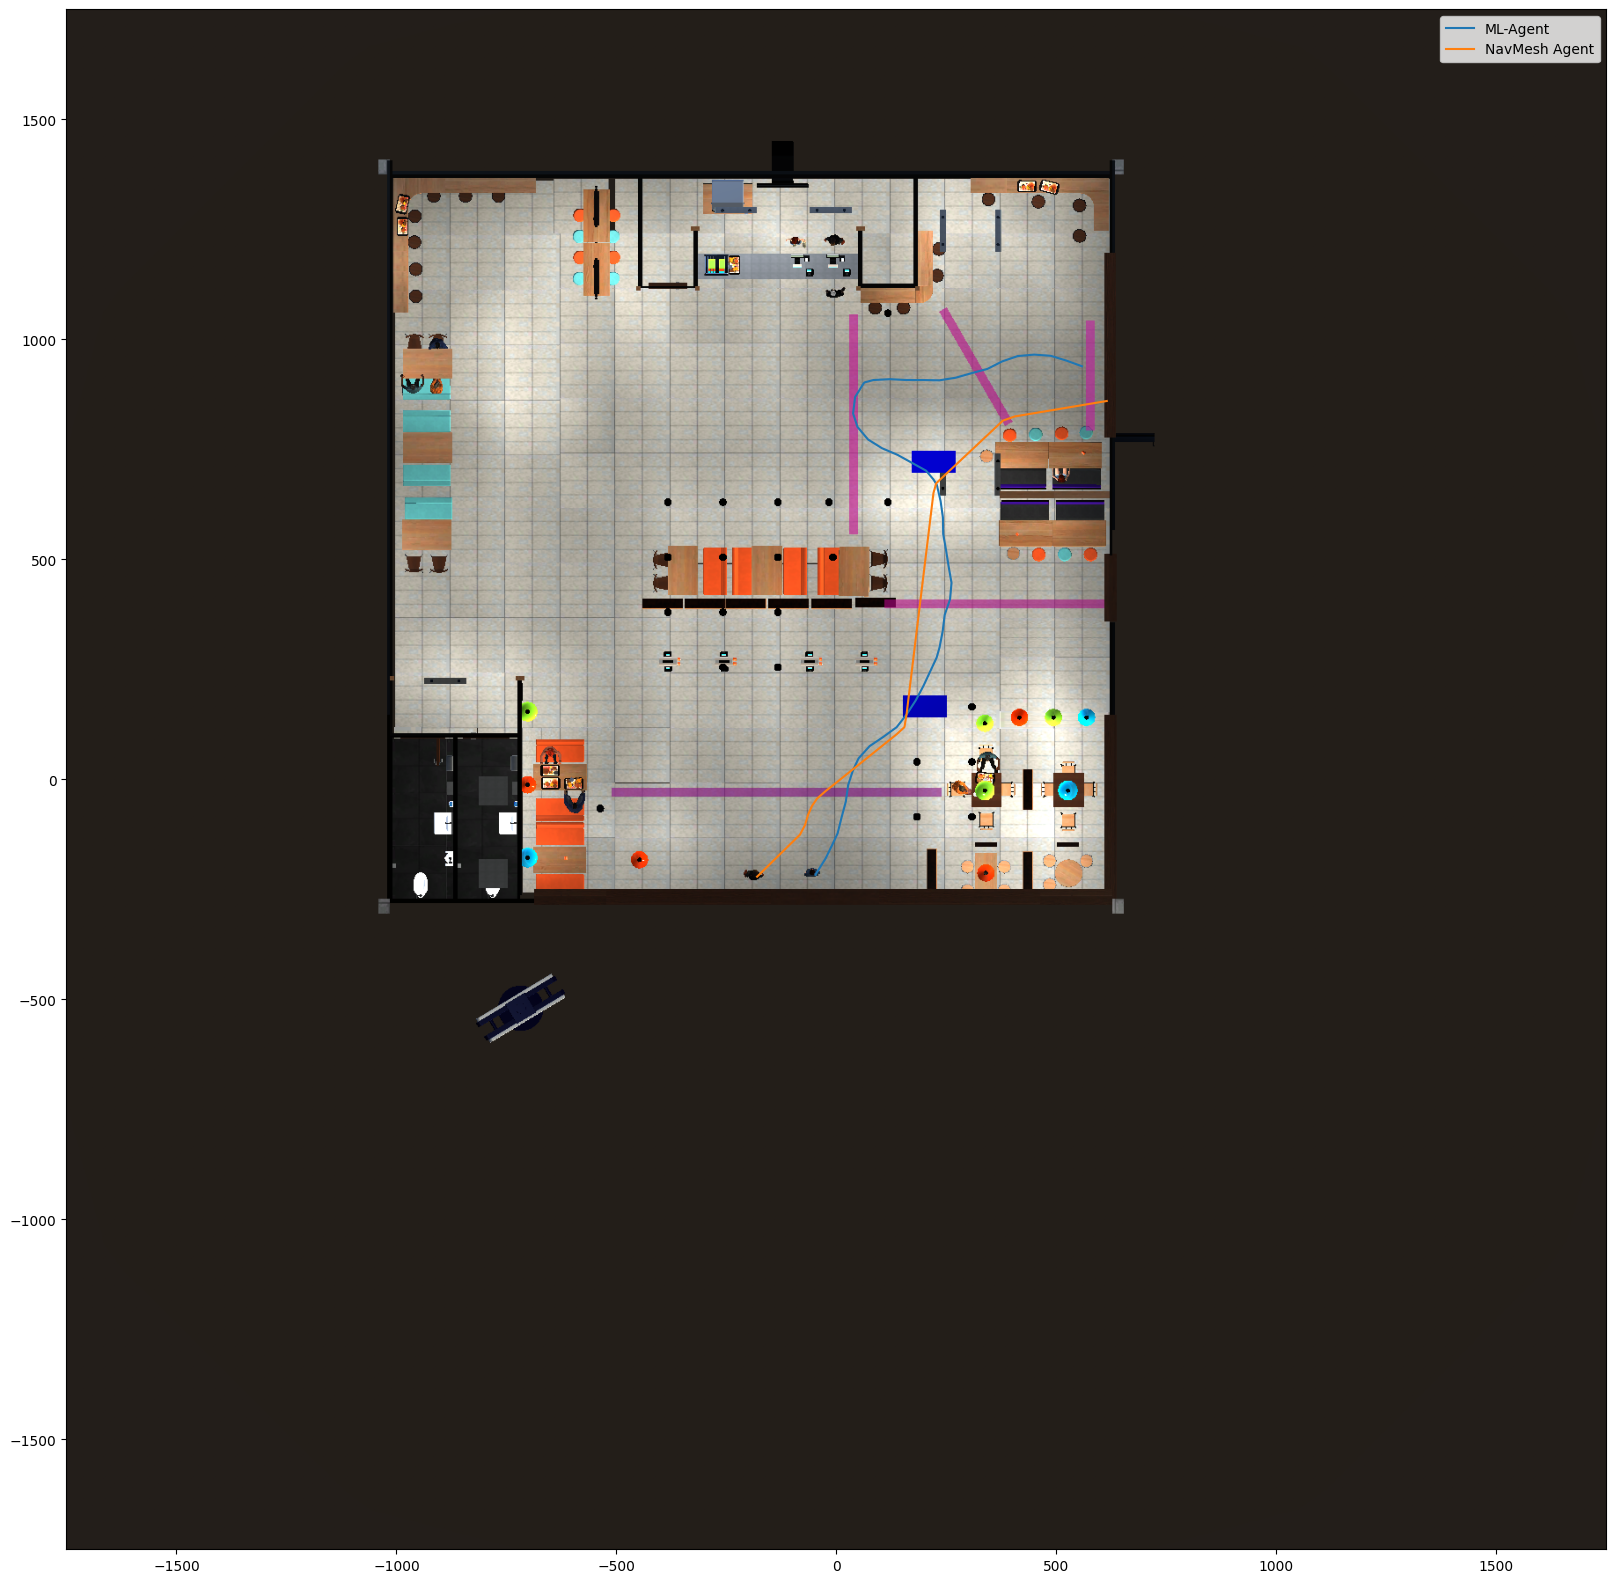

In [5]:
fig, ax = plt.subplots(figsize=(20, 20))

# Image background
img = plt.imread("BackgroundMap.png")
ax.imshow(img, zorder=0, extent=[-1750, 1750, -1750, 1750])

# For trajectories
colors = plt.cm.tab10.colors

# Plot
for i, agent_id in enumerate(traj.data["id"].unique()):
    agent_traj = traj.data[traj.data["id"] == agent_id]
    agent_label = agent_names[agent_id] if agent_id in agent_names else f"Agent {agent_id}"
    ax.plot(agent_traj["x"], agent_traj["y"],
            color=colors[i % len(colors)],
            label=agent_label)

ax.set_aspect("equal")
ax.legend()
plt.show()

## Metrics

In [6]:
def compute_agent_metrics(traj, agent_names=None):
    metrics = []
    for agent_id in traj.data["id"].unique():
        agent_traj = traj.data[traj.data["id"] == agent_id].sort_values("frame")
        x, y, frames = agent_traj["x"].values, agent_traj["y"].values, agent_traj["frame"].values
        
        # distance
        dist = np.sum(np.sqrt(np.diff(x)**2 + np.diff(y)**2))

        # duration (in seconds)
        duration = (frames[-1] - frames[0]) / traj.frame_rate

        # average speed
        avg_speed = dist / duration if duration > 0 else 0
        
        metrics.append({
            "id": agent_id,
            "name": agent_names[agent_id] if agent_names and agent_id in agent_names else str(agent_id),
            "duration": duration,
            "distance": dist,
            "avg_speed": avg_speed
        })
    return pd.DataFrame(metrics)

In [7]:
metrics = compute_agent_metrics(traj, agent_names)
metrics

,id,name,duration,distance,avg_speed
0,1113382758,ML-Agent,16.50,1825.498537,110.636275
1,-1692116382,NavMesh Agent,15.61,1492.035864,95.582054


### Plots

C:\Users\eliog\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:1281: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(aggregator, agg_var)


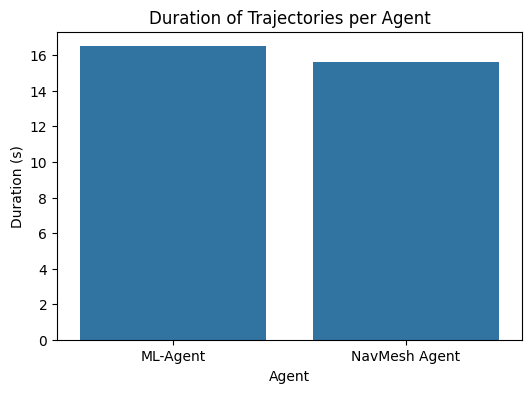

C:\Users\eliog\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:1281: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(aggregator, agg_var)


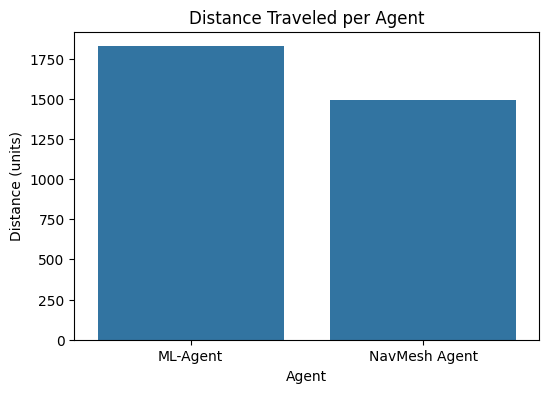

C:\Users\eliog\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:1281: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(aggregator, agg_var)


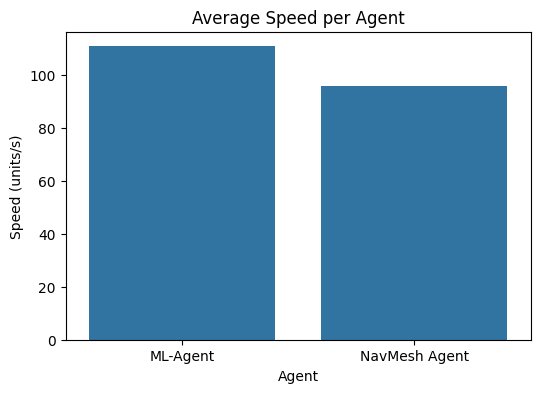

In [ ]:
# Plots of metrics

# duration for agent
plt.figure(figsize=(6,4))
sns.barplot(data=metrics, x="name", y="duration")
plt.title("Duration of Trajectories per Agent")
plt.xlabel("Agent")
plt.ylabel("Duration (s)")
plt.show()

# Distance traveled per agent
plt.figure(figsize=(6,4))
sns.barplot(data=metrics, x="name", y="distance")
plt.title("Distance Traveled per Agent")
plt.xlabel("Agent")
plt.ylabel("Distance (units)")
plt.show()

# Average speed per agent
plt.figure(figsize=(6,4))
sns.barplot(data=metrics, x="name", y="avg_speed")
plt.title("Average Speed per Agent")
plt.xlabel("Agents")
plt.ylabel("Speed (units/s)")
plt.show()
